# Basic RDD Operation

In [1]:
intRDD = sc.parallelize([3,1, 2, 5, 5])
stringRDD = sc.parallelize(["Apple", "Orange", "Banana","Grape","Apple"])
intRDD

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:480

## Transformation

In [2]:
def addOne(x):
    return (x+1)

onemore = intRDD.map(addOne)
onemore

PythonRDD[2] at RDD at PythonRDD.scala:48

In [3]:
fruit_stringRDD = stringRDD.map(lambda x: "fruit:"+x)
fruit_stringRDD

PythonRDD[3] at RDD at PythonRDD.scala:48

## Action

In [4]:
onemore.collect()

[4, 2, 3, 6, 6]

In [5]:
fruit_stringRDD.collect()

['fruit:Apple', 'fruit:Orange', 'fruit:Banana', 'fruit:Grape', 'fruit:Apple']

## More Transformations

collect() is for showing the result

In [6]:
stringRDD.filter(lambda x : "ra" in  x ).collect()

['Orange', 'Grape']

In [7]:
intRDD.filter(lambda x : 1< x and x <5  ).collect()

[3, 2]

In [8]:
intRDD.distinct().collect()

[1, 2, 3, 5]

In [9]:
sRDD = intRDD.randomSplit([0.4,0.6])
print(sRDD[0].collect())
print(sRDD[1].collect())

[3, 1, 5]
[2, 5]


In [10]:
gRDD=intRDD.groupBy(
    lambda x: "even" if (x % 2 == 0) else "odd"
).collect()
gRDD

[('even', <pyspark.resultiterable.ResultIterable at 0x7ff67dfb3f50>),
 ('odd', <pyspark.resultiterable.ResultIterable at 0x7ff67df468d0>)]

In [11]:
print (gRDD[0][0],sorted(gRDD[0][1]))
print (gRDD[1][0],sorted(gRDD[1][1]))

('even', [2])
('odd', [1, 3, 5, 5])


## More Actions

### Read

In [12]:
intRDD.first()

3

In [13]:
intRDD.take(2)

[3, 1]

In [14]:
intRDD.takeOrdered(5)

[1, 2, 3, 5, 5]

### Statistic

In [15]:
intRDD.stats()

(count: 5, mean: 3.2, stdev: 1.6, max: 5.0, min: 1.0)

In [16]:
intRDD.stdev()

1.6000000000000001

# RDD Key-Value Basic Transformation

Format: (key, value)

In [17]:
kvRDD1 = sc.parallelize([(3, 4), (3, 6), (5, 6), (1, 2)])
kvRDD1.collect()

[(3, 4), (3, 6), (5, 6), (1, 2)]

In [18]:
print(kvRDD1.keys().collect())
print(kvRDD1.values().collect())

[3, 3, 5, 1]
[4, 6, 6, 2]


In [19]:
kvRDD1.sortByKey(ascending=False).collect()

[(5, 6), (3, 4), (3, 6), (1, 2)]

# Word Count

In [20]:
textFile = sc.textFile("data/smile")

stringRDD=textFile.flatMap(lambda line : line.split(" "))
countsRDD = stringRDD.map(lambda word : (word, 1))\
                     .reduceByKey(lambda x,y : x+y)
    
countsRDD.collect()[:20]

[(u'', 1113586),
 (u'mutuals\U0001f495', 1),
 (u'7:30am,', 4),
 (u'ready!!', 28),
 (u'Re-Upload', 2),
 (u'Craziness', 2),
 (u'Place\u2019', 1),
 (u'#DAKINEISLANDGRILL\u2026', 1),
 (u'Lil__Dad', 2),
 (u'anukuntuna', 1),
 (u'#sloes', 1),
 (u'cake)', 3),
 (u'#BewajahByAnirudh', 8),
 (u'#DataProtection', 1),
 (u'#AsGoodAsItGets', 1),
 (u'#FierceTamaraws', 9),
 (u'considered)', 3),
 (u'Twilight(s)', 1),
 (u'faggot)', 1),
 (u'Anti-LGBT\u2026', 1)]

## Detail

### Readfile

In [21]:
textFile = sc.textFile("data/test.txt")
textFile.collect()

[u'Apple Apple Orange', u'Banana Grape Grape']

### Get Every word

In [22]:
stringRDD=textFile.map(lambda line : line.split(" ")) # hierarchy
stringRDD.collect()

[[u'Apple', u'Apple', u'Orange'], [u'Banana', u'Grape', u'Grape']]

In [23]:
stringRDD=textFile.flatMap(lambda line : line.split(" ")) # flat
stringRDD.collect()

[u'Apple', u'Apple', u'Orange', u'Banana', u'Grape', u'Grape']

In [24]:
stringRDD.map(lambda word : (word, 1)).collect()

[(u'Apple', 1),
 (u'Apple', 1),
 (u'Orange', 1),
 (u'Banana', 1),
 (u'Grape', 1),
 (u'Grape', 1)]

In [25]:
stringRDD.map(lambda word : (word, 1)).reduceByKey(lambda x,y : x+y).collect()

[(u'Orange', 1), (u'Grape', 2), (u'Apple', 2), (u'Banana', 1)]

# Spark SQL

In [26]:
RawUserRDD= sc.textFile("data/u.user")

In [27]:
RawUserRDD.count()

943

In [28]:
RawUserRDD.take(5)

[u'1|24|M|technician|85711',
 u'2|53|F|other|94043',
 u'3|23|M|writer|32067',
 u'4|24|M|technician|43537',
 u'5|33|F|other|15213']

In [29]:
userRDD =RawUserRDD.map(lambda line: line.split("|"))
userRDD .take(5)

[[u'1', u'24', u'M', u'technician', u'85711'],
 [u'2', u'53', u'F', u'other', u'94043'],
 [u'3', u'23', u'M', u'writer', u'32067'],
 [u'4', u'24', u'M', u'technician', u'43537'],
 [u'5', u'33', u'F', u'other', u'15213']]

## To Dataframe

In [30]:
sqlContext = SparkSession.builder.getOrCreate() # Entry

In [31]:
from pyspark.sql import Row
user_Rows = userRDD.map(lambda p:
     Row(
         userid=int(p[0]), 
         age=int(p[1]),
         gender=p[2],
         occupation=p[3],
         zipcode=p[4]
    )
)
user_Rows.take(5)

[Row(age=24, gender=u'M', occupation=u'technician', userid=1, zipcode=u'85711'),
 Row(age=53, gender=u'F', occupation=u'other', userid=2, zipcode=u'94043'),
 Row(age=23, gender=u'M', occupation=u'writer', userid=3, zipcode=u'32067'),
 Row(age=24, gender=u'M', occupation=u'technician', userid=4, zipcode=u'43537'),
 Row(age=33, gender=u'F', occupation=u'other', userid=5, zipcode=u'15213')]

In [32]:
user_df = sqlContext.createDataFrame(user_Rows)
user_df .printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [33]:
user_df.show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [34]:
# short name
# df=user_df.alias("df")
# df.show(5)

## As Table

In [35]:
user_df.registerTempTable("user_table")

In [36]:
sqlContext.sql(" SELECT count(*) as counts FROM user_table").show()

+------+
|counts|
+------+
|   943|
+------+



In [37]:
sqlContext.sql(" SELECT *  FROM user_table ").show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

## Filter

In [38]:
sqlContext.sql(
'''SELECT *  
FROM user_table 
where occupation='technician' and   gender='M' and age=24'''
).show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



# Join

In [39]:
rawDataWithHeader = sc.textFile("data/free-zipcode-database-Primary.csv")
rawDataWithHeader .take(2)

[u'"Zipcode","ZipCodeType","City","State","LocationType","Lat","Long","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages"',
 u'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,']

In [40]:
header = rawDataWithHeader.first()
rawData = rawDataWithHeader.filter(lambda x:x !=header)
rawData.first()

u'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,'

## Data Propressing

In [41]:
rData=rawData.map(lambda x: x.replace("\"", ""))   
rData.first()

u'00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,'

In [42]:
ZipRDD = rData.map(lambda x: x.split(","))
ZipRDD.first()

[u'00705',
 u'STANDARD',
 u'AIBONITO',
 u'PR',
 u'PRIMARY',
 u'18.14',
 u'-66.26',
 u'NA-US-PR-AIBONITO',
 u'false',
 u'',
 u'',
 u'']

## Create Table

In [43]:
from pyspark.sql import Row
zipcode_data =ZipRDD .map(lambda p: 
   Row(
    zipcode=int(p[0]), 
    zipCodeType=p[1],
    city=p[2],
    state=p[3]
    )
)
zipcode_data.take(5)

[Row(city=u'AIBONITO', state=u'PR', zipCodeType=u'STANDARD', zipcode=705),
 Row(city=u'ANASCO', state=u'PR', zipCodeType=u'STANDARD', zipcode=610),
 Row(city=u'ANGELES', state=u'PR', zipCodeType=u'PO BOX', zipcode=611),
 Row(city=u'ARECIBO', state=u'PR', zipCodeType=u'STANDARD', zipcode=612),
 Row(city=u'ADJUNTAS', state=u'PR', zipCodeType=u'STANDARD', zipcode=601)]

In [44]:
zipcode_df  = sqlContext.createDataFrame(zipcode_data )
zipcode_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- zipcode: long (nullable = true)



In [45]:
zipcode_df.registerTempTable("zipcode_table")
zipcode_df.show(10)

+---------+-----+-----------+-------+
|     city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
| AIBONITO|   PR|   STANDARD|    705|
|   ANASCO|   PR|   STANDARD|    610|
|  ANGELES|   PR|     PO BOX|    611|
|  ARECIBO|   PR|   STANDARD|    612|
| ADJUNTAS|   PR|   STANDARD|    601|
| CASTANER|   PR|     PO BOX|    631|
|   AGUADA|   PR|   STANDARD|    602|
|AGUADILLA|   PR|   STANDARD|    603|
|AGUADILLA|   PR|     PO BOX|    604|
|AGUADILLA|   PR|     PO BOX|    605|
+---------+-----+-----------+-------+
only showing top 10 rows



In [46]:
sqlContext.sql(""" 
SELECT z.* 
FROM zipcode_table z 
""").show(10)

+---------+-----+-----------+-------+
|     city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
| AIBONITO|   PR|   STANDARD|    705|
|   ANASCO|   PR|   STANDARD|    610|
|  ANGELES|   PR|     PO BOX|    611|
|  ARECIBO|   PR|   STANDARD|    612|
| ADJUNTAS|   PR|   STANDARD|    601|
| CASTANER|   PR|     PO BOX|    631|
|   AGUADA|   PR|   STANDARD|    602|
|AGUADILLA|   PR|   STANDARD|    603|
|AGUADILLA|   PR|     PO BOX|    604|
|AGUADILLA|   PR|     PO BOX|    605|
+---------+-----+-----------+-------+
only showing top 10 rows



## Join Operation

In [47]:
sqlContext.sql(""" 
SELECT u.* ,z.city,z.state 
FROM user_table u 
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
WHERE z.state='NY'
""").show(10)

+---+------+-------------+------+-------+----------------+-----+
|age|gender|   occupation|userid|zipcode|            city|state|
+---+------+-------------+------+-------+----------------+-----+
| 22|     F|   healthcare|   405|  10019|        NEW YORK|   NY|
| 29|     M|        other|   478|  10019|        NEW YORK|   NY|
| 22|     M|      student|   327|  11101|LONG ISLAND CITY|   NY|
| 48|     M|     educator|   656|  10314|   STATEN ISLAND|   NY|
| 27|     F|       writer|   617|  11201|        BROOKLYN|   NY|
| 35|     F|        other|   760|  14211|         BUFFALO|   NY|
| 32|     F|        other|   155|  11217|        BROOKLYN|   NY|
| 30|     F|       writer|   557|  11217|        BROOKLYN|   NY|
| 27|     M|    marketing|   806|  11217|        BROOKLYN|   NY|
| 23|     M|administrator|   509|  10011|        NEW YORK|   NY|
+---+------+-------------+------+-------+----------------+-----+
only showing top 10 rows



In [48]:
sqlContext.sql(""" 
SELECT z.state ,count(*)
FROM user_table u
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
GROUP BY z.state 
""").show(60)

+-----+--------+
|state|count(1)|
+-----+--------+
|   AZ|      14|
|   SC|      11|
|   LA|       6|
|   MN|      78|
|   NJ|      18|
|   DC|      14|
|   OR|      20|
|   VA|      27|
| null|      35|
|   RI|       3|
|   KY|      11|
|   WY|       1|
|   NH|       6|
|   MI|      23|
|   NV|       3|
|   WI|      22|
|   ID|       7|
|   CA|     116|
|   NE|       6|
|   CT|      17|
|   MT|       2|
|   NC|      19|
|   VT|       5|
|   MD|      27|
|   DE|       3|
|   MO|      17|
|   IL|      50|
|   ME|       2|
|   WA|      24|
|   ND|       2|
|   MS|       3|
|   AL|       3|
|   IN|       9|
|   AE|       1|
|   OH|      32|
|   TN|      12|
|   IA|      14|
|   NM|       2|
|   PA|      34|
|   SD|       1|
|   NY|      60|
|   TX|      51|
|   WV|       3|
|   GA|      19|
|   MA|      35|
|   KS|       4|
|   CO|      20|
|   FL|      24|
|   AK|       5|
|   AR|       1|
|   OK|       9|
|   AP|       1|
|   UT|       9|
|   HI|       2|
+-----+--------+



In [49]:
GroupByState_df = sqlContext.sql(""" 
SELECT z.state ,count(*) as counts
FROM user_table u
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
GROUP BY z.state 
""")
GroupByState_df.show(10)

+-----+------+
|state|counts|
+-----+------+
|   AZ|    14|
|   SC|    11|
|   LA|     6|
|   MN|    78|
|   NJ|    18|
|   DC|    14|
|   OR|    20|
|   VA|    27|
| null|    35|
|   RI|     3|
+-----+------+
only showing top 10 rows



## Plot

In [50]:
# %pip3 install pandas

In [51]:
import pandas as pd

GroupByState_pandas_df =GroupByState_df.toPandas().set_index('state')
GroupByState_pandas_df

,counts
state,
AZ,14
SC,11
LA,6
MN,78
NJ,18
DC,14
OR,20
VA,27
NaN,35


In [52]:
GroupByState_pandas_df.T

state,AZ,SC,LA,MN,NJ,DC,OR,VA,None,RI,...,MA,KS,CO,FL,AK,AR,OK,AP,UT,HI
counts,14,11,6,78,18,14,20,27,35,3,...,35,4,20,24,5,1,9,1,9,2


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

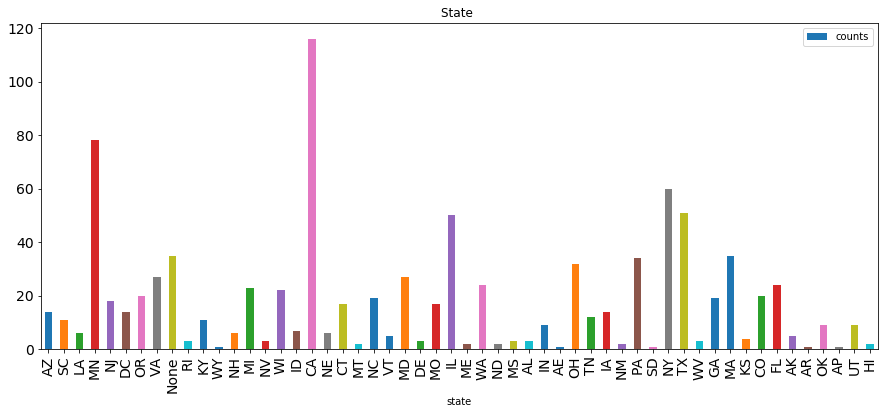

In [54]:

ax = GroupByState_pandas_df ['counts']  \
            .plot(kind='bar', title ="State ",figsize=(15,6),legend=True, fontsize=14)
plt.show()

In [55]:
Occupation_df=sqlContext.sql(""" 
SELECT u.occupation ,count(*) counts
FROM user_table u
GROUP BY occupation
""")
Occupation_df.show(30)

+-------------+------+
|   occupation|counts|
+-------------+------+
|    librarian|    51|
|      retired|    14|
|       lawyer|    12|
|         none|     9|
|       writer|    45|
|   programmer|    66|
|    marketing|    26|
|        other|   105|
|    executive|    32|
|    scientist|    31|
|      student|   196|
|     salesman|    12|
|       artist|    28|
|   technician|    27|
|administrator|    79|
|     engineer|    67|
|   healthcare|    16|
|     educator|    95|
|entertainment|    18|
|    homemaker|     7|
|       doctor|     7|
+-------------+------+



In [56]:
Occupation_pandas_df =Occupation_df.toPandas().set_index('occupation')
Occupation_pandas_df

,counts
occupation,
librarian,51
retired,14
lawyer,12
none,9
writer,45
programmer,66
marketing,26
other,105
executive,32


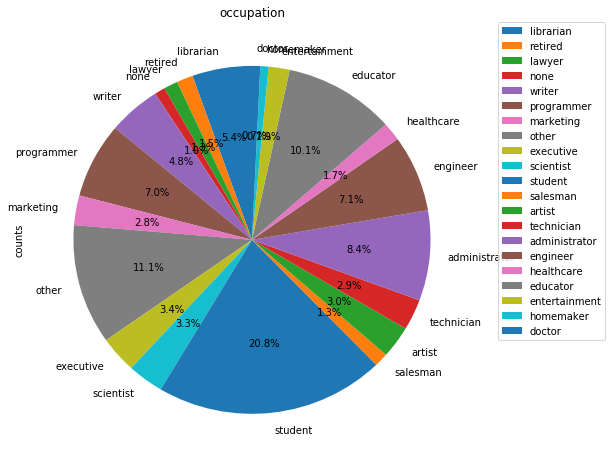

In [57]:
ax =Occupation_pandas_df['counts'].plot(kind='pie',
           title ="occupation",figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()